In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
import seaborn as sns
from astropy import stats
from astropy.stats import sigma_clip,mad_std
from astropy import coordinates
import astropy.units as u

In [11]:
cv = pd.read_csv("10000cv.csv")
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   run     10000 non-null  int64  
 1   camCol  10000 non-null  int64  
 2   rerun   10000 non-null  int64  
 3   field   10000 non-null  int64  
 4   objID   10000 non-null  int64  
 5   u       10000 non-null  float64
 6   g       10000 non-null  float64
 7   r       10000 non-null  float64
 8   i       10000 non-null  float64
 9   z       10000 non-null  float64
 10  Err_u   10000 non-null  float64
 11  Err_g   10000 non-null  float64
 12  Err_r   10000 non-null  float64
 13  Err_i   10000 non-null  float64
 14  Err_z   10000 non-null  float64
 15  ra      10000 non-null  float64
 16  dec     10000 non-null  float64
dtypes: float64(12), int64(5)
memory usage: 1.3 MB


Creating a Aintoff Projection




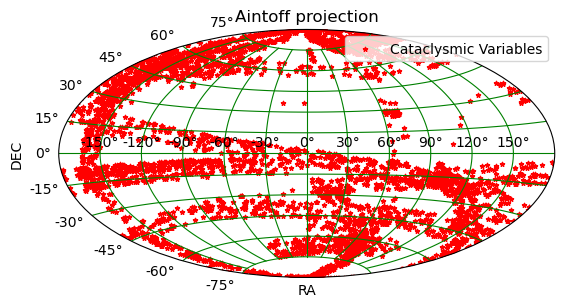

In [12]:
plt.subplot(projection = 'aitoff')
plt.scatter(cv['ra'], cv['dec'], s=10, marker = '*', c='r', label = 'Cataclysmic Variables')
plt.grid(c = 'green')
plt.title('Aintoff projection')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend(loc =1)
#plt.savefig("aintoff.pdf")
plt.show()


In [ ]:
#cv_fits = fits.open('Cv.fits', memmap=True)
#cv_fits.close()
#with fits.open('Cv.fits') as hdul: cannot open in this way

COLOR-MAGNITUD Diagram in which we can see the average temperature of this Cataclismic variables 

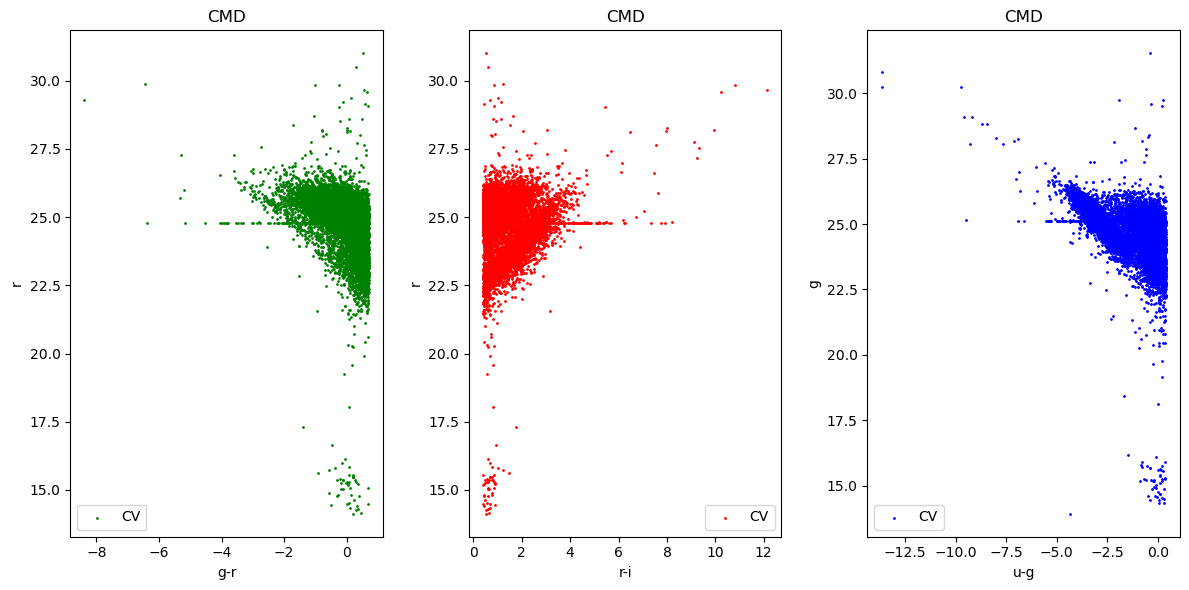

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

axes[0].scatter(cv['g']-cv['r'], cv['r'],label='CV', marker='o', s=1, c='g')
axes[0].set_title("CMD")
axes[0].set_xlabel('g-r')
axes[0].set_ylabel('r')
axes[0].legend(loc=3)

axes[1].scatter(cv['r']-cv['i'], cv['r'],label='CV', marker='o', s=1, c='r')
#axes[1].axis('tight')
axes[1].set_title("CMD")
axes[1].set_xlabel('r-i')
axes[1].set_ylabel('r')
axes[1].legend(loc=4)


axes[2].scatter(cv['u']-cv['g'], cv['g'],label='CV', marker='o', s=1, c='blue')
axes[2].set_title("CMD");
axes[2].set_xlabel('u-g')
axes[2].set_ylabel('g')
axes[2].legend(loc=3)
fig.tight_layout()
plt.savefig("cmd.pdf")
plt.show()

Now we calculate the mean, max, min values for each magnitude

In [14]:
mean_u = np.mean(cv['u'])
mean_err_u = np.mean(cv['Err_u'])
mean_g = np.mean(cv['g'])
mean_err_g = np.mean(cv['Err_g'])
mean_r = np.mean(cv['r'])
mean_err_r = np.mean(cv['Err_r'])
mean_i = np.mean(cv['i'])
mean_err_i = np.mean(cv['Err_i'])
mean_z = np.mean(cv['u'])
mean_err_z = np.mean(cv['Err_z'])

cv.agg(
    {
        "u": ["min", "max", "median", "mean"],
        "g": ["min", "max", "median", "mean"],
        "r": ["min", "max", "median", "mean"],
        "i": ["min", "max", "median", "mean"],
        "z": ["min", "max", "median", "mean"],
    }
)



,u,g,r,i,z
min,9.581036,13.925890,14.129340,13.51659,8.264819
max,31.132470,31.524070,31.003910,30.48521,29.801950
median,22.824975,24.827035,24.962960,23.79732,21.877870
mean,23.111521,24.659438,24.769152,23.40856,21.766964


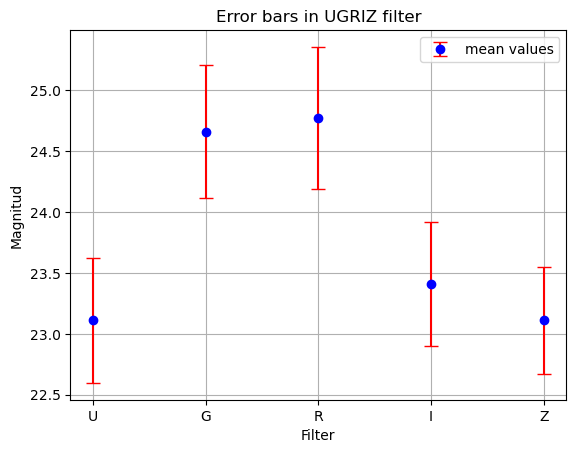

In [15]:


filters = ['U','G', 'R', 'I', 'Z']
magnitud = [mean_u,mean_g,mean_r,mean_i,mean_z]
errors = [mean_err_u,mean_err_g,mean_err_r,mean_err_i,mean_err_z] 

#error bars
plt.errorbar(filters, magnitud, yerr=errors, fmt='o', capsize=5, 
             ecolor='red', linestyle='None', color='blue', label='mean values')

plt.xlabel('Filter')
plt.ylabel('Magnitud')
plt.title('Error bars in UGRIZ filter')
#plt.gca().invert_yaxis()  
plt.legend()
plt.grid(True)
plt.savefig("error.pdf")
plt.show()

Using Scipy we can use of statistics description:

In [16]:
stats_summary_u =scipy.stats.describe(cv['u'],ddof =1, bias=False)
stats_summary_g =scipy.stats.describe(cv['g'],ddof =1, bias=False)
stats_summary_r =scipy.stats.describe(cv['r'],ddof =1, bias=False)
stats_summary_i =scipy.stats.describe(cv['i'],ddof =1, bias=False)
stats_summary_z =scipy.stats.describe(cv['z'],ddof =1, bias=False)

In [8]:
print (stats_summary_g)

DescribeResult(nobs=10000, minmax=(13.92589, 31.52407), mean=24.662457049, variance=1.1964105235548772, skewness=-3.225368046581477, kurtosis=26.318761065234025)


saving the summary statistic in a table and using list comprehension

In [17]:
tabla = [stats_summary_u,stats_summary_g,stats_summary_r,stats_summary_i,stats_summary_z]
[print(row) for row in tabla]


DescribeResult(nobs=10000, minmax=(9.581036, 31.13247), mean=23.1115207076, variance=1.566529729262491, skewness=-1.0362470249754692, kurtosis=8.668212733794403)
DescribeResult(nobs=10000, minmax=(13.92589, 31.52407), mean=24.659437587, variance=1.2037181321304604, skewness=-3.2004075584247427, kurtosis=25.976791269353964)
DescribeResult(nobs=10000, minmax=(14.12934, 31.00391), mean=24.769151795, variance=1.3172769864489127, skewness=-3.0001758107049166, kurtosis=22.37965233812577)
DescribeResult(nobs=10000, minmax=(13.51659, 30.48521), mean=23.408559938, variance=1.8191206462942253, skewness=-1.6587306522853231, kurtosis=8.21839632660885)
DescribeResult(nobs=10000, minmax=(8.264819, 29.80195), mean=21.766964183899997, variance=1.7238576939016932, skewness=-1.7523265662134386, kurtosis=9.104801462643819)


[None, None, None, None, None]

test normality in filters by plotting histogram and fitting a Gaussian, we look throug two properties Skewness and kurtois ,Skewness is a measure of symmetry, or more precisely, the lack of symmetry.
Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. 

Skewness of filter u: -1.036247
Kurtosis of filter u: 8.668213
Skewness of filter g: -3.200408
Kurtosis of filter g: 25.976791
Skewness of filter r: -3.000176
Kurtosis of filter r: 22.379652
Skewness of filter i: -1.658731
Kurtosis of filter i: 8.218396
Skewness of filter z: -1.752327
Kurtosis of filter z: 9.104801


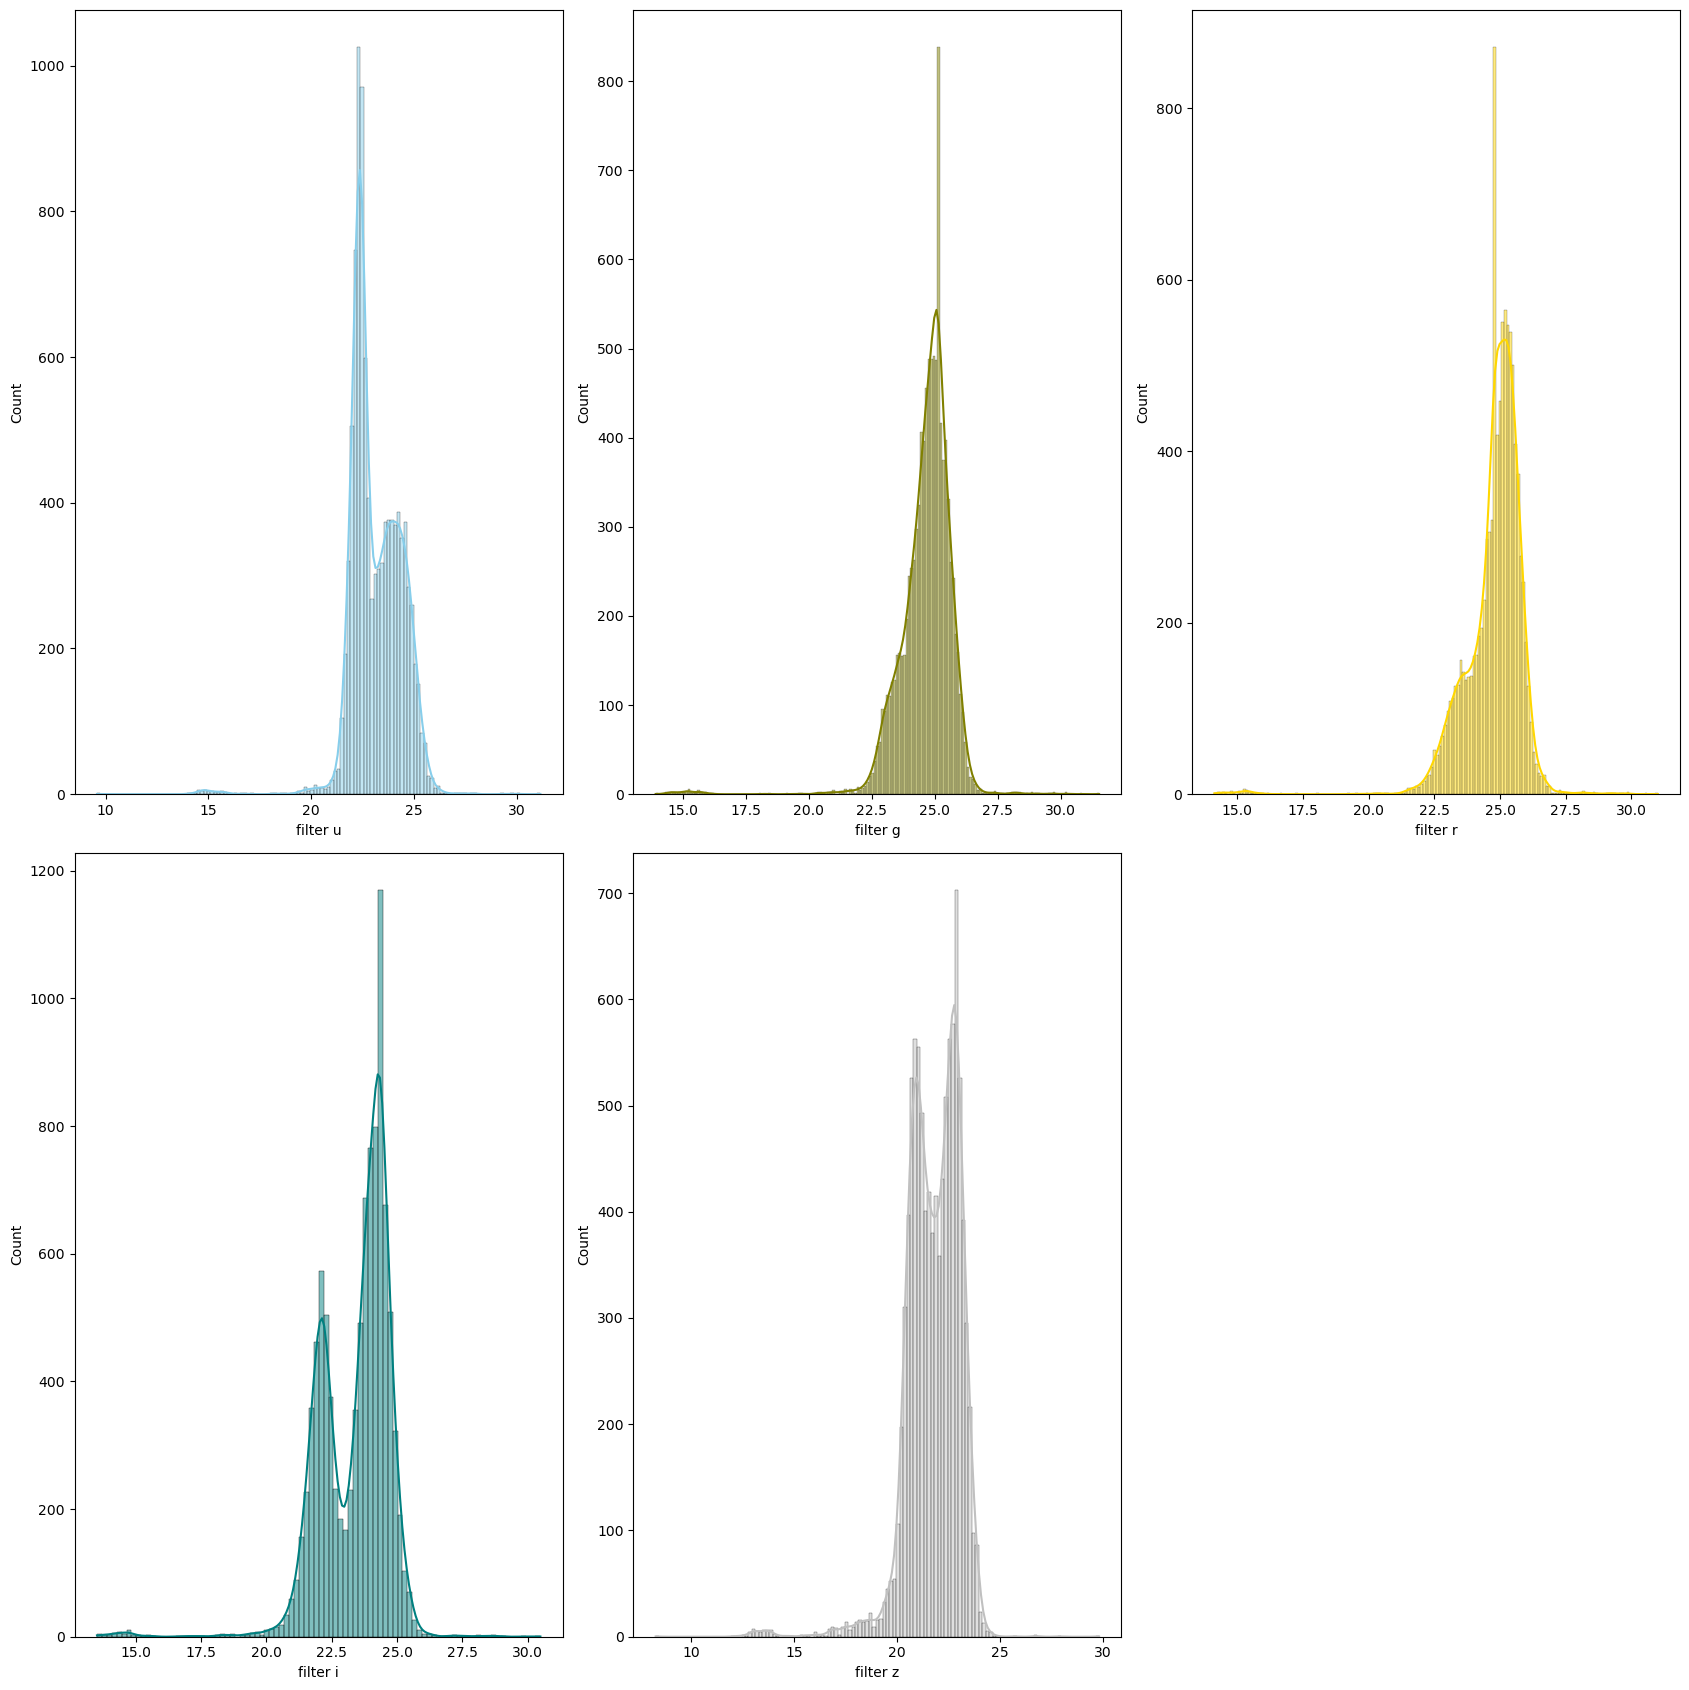

In [86]:
f, axes = plt.subplots(2,3, figsize =(17,17))

sns.histplot(cv['u'], kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_xlabel('filter u')
print("Skewness of filter u: %f" % cv['u'].skew())
print("Kurtosis of filter u: %f" % cv['u'].kurt())


sns.histplot(cv['g'], kde=True, color="olive", ax=axes[0, 1])
axes[0, 1].set_xlabel('filter g')
print("Skewness of filter g: %f" % cv['g'].skew())
print("Kurtosis of filter g: %f" % cv['g'].kurt())

sns.histplot(cv['r'], kde=True, color="gold", ax=axes[0, 2])
axes[0, 2].set_xlabel('filter r')
print("Skewness of filter r: %f" % cv['r'].skew())
print("Kurtosis of filter r: %f" % cv['r'].kurt())

sns.histplot(cv['i'], kde=True, color="teal", ax=axes[1, 0])
axes[1, 0].set_xlabel('filter i')
print("Skewness of filter i: %f" % cv['i'].skew())
print("Kurtosis of filter i: %f" % cv['i'].kurt())

sns.histplot(cv['z'], kde=True, color="silver", ax=axes[1, 1])
axes[1, 1].set_xlabel('filter z')
print("Skewness of filter z: %f" % cv['z'].skew())
print("Kurtosis of filter z: %f" % cv['z'].kurt())

axes[1, 2].axis('off')  # Eliminate the empty plot
plt.tight_layout()
plt.savefig("fig4.pdf")
plt.show()


We want to know if there is a possible correlation between the filters 

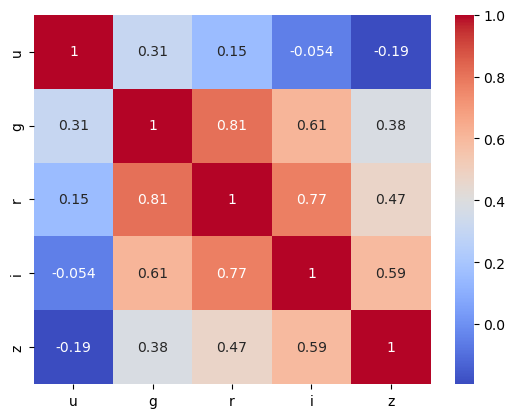

In [87]:
filters = ['u', 'g', 'r', 'i', 'z']
corr_matrix = cv[filters].corr()# create a correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.savefig("fig5.pdf")
plt.show()

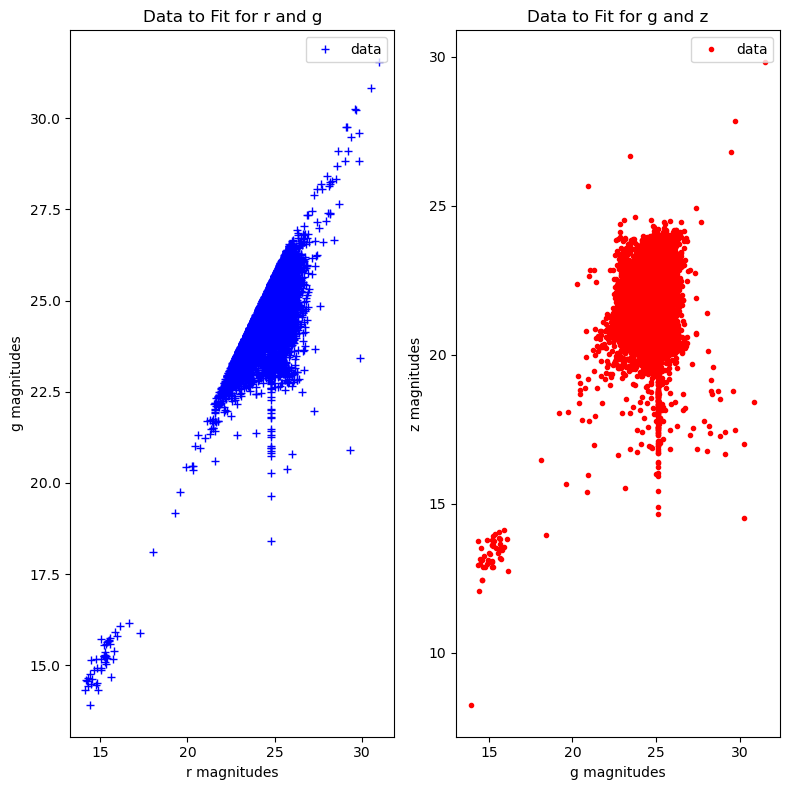

In [88]:
f, axes = plt.subplots(1,2, figsize =(8,8))
axes[0].plot(cv['r'], cv['g'], 'b+', label='data')
axes[0].set_xlabel('r magnitudes')
axes[0].set_ylabel('g magnitudes')
axes[0].set_title('Data to Fit for r and g')
axes[0].legend()

axes[1].plot(cv['g'], cv['z'], 'r.', label='data')
axes[1].set_xlabel('g magnitudes')
axes[1].set_ylabel('z magnitudes')
axes[1].set_title('Data to Fit for g and z')
axes[1].legend()

plt.tight_layout()  
plt.savefig("fig6.pdf")
plt.show()

We now define a function called linear_fit that implements the equations given above and returns two values: the slope  and the -intercept.

Time for linear_fit: 0.01794 seconds


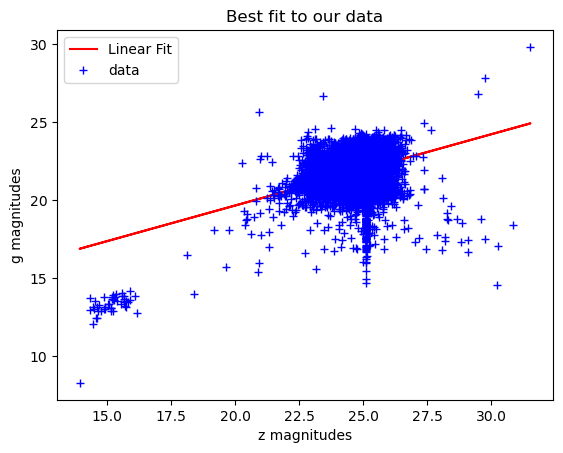

In [105]:
import time
def linear_fit(x_data, y_data):
    start_time = time.time()
    N = len(x_data)
    array_1 = np.array([[N, np.sum(x_data)],[np.sum(x_data),np.sum(x_data**2)]])
    array_3 = np.array([[np.sum(y_data)],[np.sum(y_data*x_data)]])
    array_1_inv = np.linalg.inv(array_1)
    out_arr = np.dot(array_1_inv,array_3)
    intercept, slope = out_arr[0], out_arr[1]
    return slope, intercept
    end_time = time.time()
    print(f"Time for linear_fit: {end_time - start_time:.5f} seconds")

def plot_fit(x,y):
    start_time = time.time()
    slope, intercept = linear_fit(x,y)
    fit_line = slope*x + intercept
    plt.plot(x,fit_line,'r',label='Linear Fit')
    plt.plot(x,y,'b+',label='data')
    plt.legend()
    plt.xlabel('z magnitudes')
    plt.ylabel('g magnitudes')
    plt.title('Best fit to our data')
    #plt.show()
    end_time = time.time()
    print(f"Time for linear_fit: {end_time - start_time:.5f} seconds")
    

#plot_fit(cv['r'],cv['g'])
plot_fit(cv['g'],cv['z'])



In [22]:
def return_residuals(x,y):
    slope, intercept = linear_fit(x,y)
    fit_line = slope*x + intercept
    residuals = y - fit_line
    return residuals, np.sum(residuals)

residuals, sum_residuals = return_residuals(cv['r'],cv['g'])
residuals, sum_residuals2 = return_residuals(cv['g'],cv['z'])
print (sum_residuals,sum_residuals2)

2.920842234743759e-09 -5.51294476736075e-09


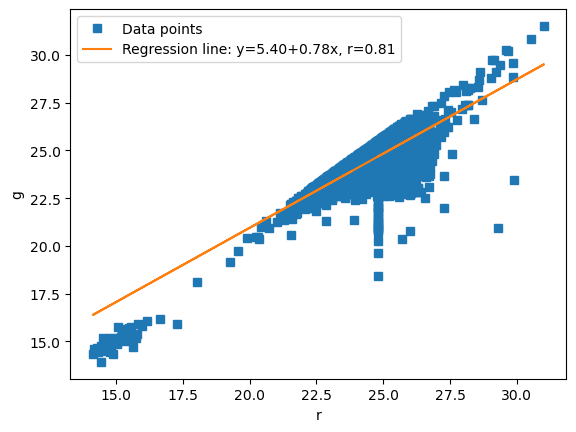

In [23]:

slope, intercept, r, *__ = scipy.stats.linregress(cv['r'],cv['g'])
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
fig, ax = plt.subplots()
ax.plot(cv['r'],cv['g'], linewidth=0, marker ='s', label ='Data points')
ax.plot(cv['r'], intercept + slope * cv['r'], label=line)
ax.set_xlabel('r')
ax.set_ylabel('g')
ax.legend(facecolor ='white')
plt.show()

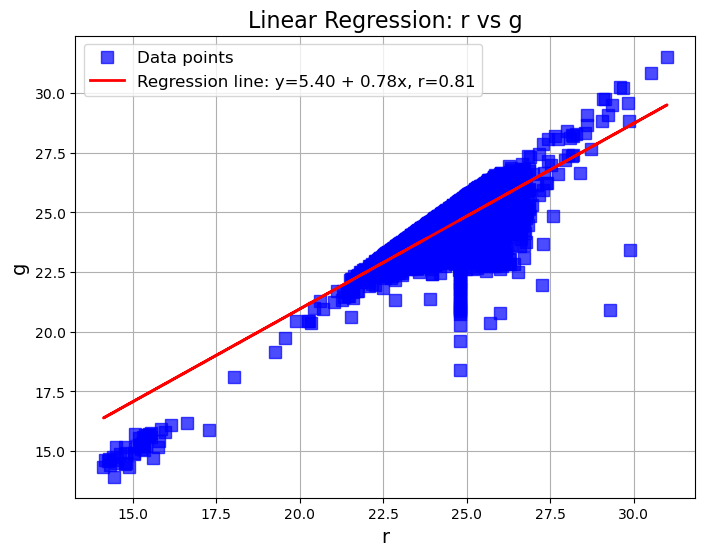

Time for linear_fit: 0.17283 seconds


In [102]:
import scipy.stats as stats
start_time = time.time()
# Perform the linear regression
slope, intercept, r, p_value, std_err = stats.linregress(cv['r'], cv['g'])

# Create the regression line equation for display
line = f'Regression line: y={intercept:.2f} + {slope:.2f}x, r={r:.2f}'

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))  # Increase the figure size for better readability

# Plot the data points with larger markers and some transparency (alpha)
ax.plot(cv['r'], cv['g'], 'bs', markersize=8, label='Data points', alpha=0.7)

# Plot the regression line
ax.plot(cv['r'], intercept + slope * cv['r'], 'r-', label=line, linewidth=2)

# Labeling the axes
ax.set_xlabel('r', fontsize=14)
ax.set_ylabel('g', fontsize=14)

# Add grid for better readability
ax.grid(True)

# Set the title of the plot
ax.set_title('Linear Regression: r vs g', fontsize=16)

# Show the legend with improved visibility
ax.legend(facecolor='white', fontsize=12)

# Display the plot
plt.show()
end_time = time.time()
print(f"Time for linear_fit: {end_time - start_time:.5f} seconds")

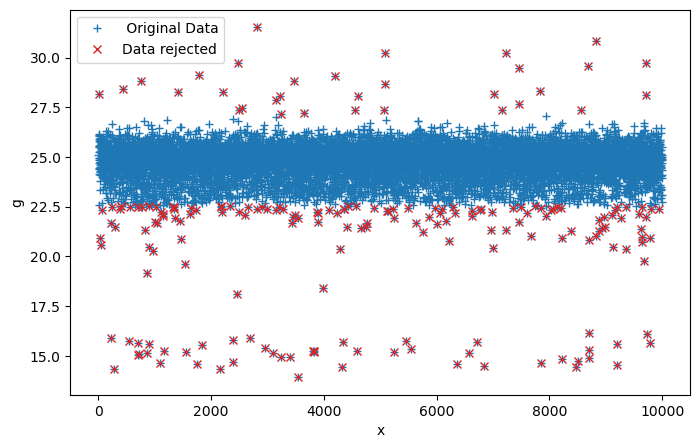

In [37]:
y = cv['g'].to_numpy()  # convert the csv column to an array

# same as lentgh
x = np.arange(len(y))

# we use the filter
filtered_data = sigma_clip(y, sigma=3, maxiters=1, stdfunc=mad_std)

# Plotting
plt.figure(figsize=(8,5))
plt.plot(x, y, '+', color='#1f77b4', label=" Original Data")
plt.plot(x[filtered_data.mask], y[filtered_data.mask], 'x', color='#d62728', label="Data rejected")
plt.xlabel('x')
plt.ylabel('g')
plt.legend(loc=2, numpoints=1)
plt.show()

  MAIN_ID          RA      ...     COO_BIBCODE     SCRIPT_NUMBER_ID
                "h:m:s"    ...                                     
------------ ------------- ... ------------------- ----------------
V* V1040 Cen 11 55 27.2600 ... 2020yCat.1350....0G                1


In [71]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object("V1040 Cen")
print(result_table)
ra =result_table['RA']
dec =result_table['DEC']


from astroquery.sdss import SDSS

from astropy import coordinates as coords

pos = coords.SkyCoord('11h55m27.26s -56d41m56.3s', frame='icrs')

xid = SDSS.query_region(pos, radius='5 arcsec', spectro=True)

print(xid)
ra,dec

  MAIN_ID          RA      ...     COO_BIBCODE     SCRIPT_NUMBER_ID
                "h:m:s"    ...                                     
------------ ------------- ... ------------------- ----------------
V* V1040 Cen 11 55 27.2600 ... 2020yCat.1350....0G                1
None


(<MaskedColumn name='RA' dtype='str13' unit='"h:m:s"' description='Right ascension' length=1>
 11 55 27.2600,
 <MaskedColumn name='DEC' dtype='str13' unit='"d:m:s"' description='Declination' length=1>
 -56 41 56.294)

In [81]:
from astroquery.gaia import Gaia


radius  = 1.0        
inp_ra  = 56.87125   
inp_dec = 24.10493   

query = f"SELECT * FROM gaiadr3.gaia_source_lite \
WHERE DISTANCE(POINT({inp_ra}, {inp_dec}),POINT(ra, dec)) < {radius} AND \
ruwe <1.4 AND parallax_over_error >10"

job     = Gaia.launch_job_async(query)
results = job.get_results()
print(f'Table size (rows): {len(results)}')
results['SOURCE_ID', 'ra', 'dec', 'pmra' ,'pmdec', 'parallax']




INFO: Query finished. [astroquery.utils.tap.core]
Table size (rows): 4032


SOURCE_ID,ra,dec,pmra,pmdec,parallax
,deg,deg,mas / yr,mas / yr,mas
int64,float64,float64,float64,float64,float64
69805798521250560,56.24863115999279,24.642582257680882,2.190487348950862,-13.465314592937117,0.9437596679009509
69805901600465152,56.24727995894163,24.65570538537785,0.49759409475044836,-3.8273885658895668,0.8311574217226121
69805901600465536,56.248963878828214,24.646361688721974,7.372404958972663,-6.369812663837182,1.5491388879533554
69805935960203392,56.27054240577331,24.6474754189256,6.8928967344856975,-8.05494305625505,1.025008949947923
69806039039416832,56.27740714247925,24.678409040272616,20.24411977407674,-44.80748682496666,7.5284014269211195
69806107758894976,56.24396966595952,24.665878429795082,30.429650578356245,-21.351212463789484,2.9152954059140637
...,...,...,...,...,...
66873053115788800,57.44519493675477,24.949412751851238,-6.089689651619146,7.787121246684261,2.236350307216108


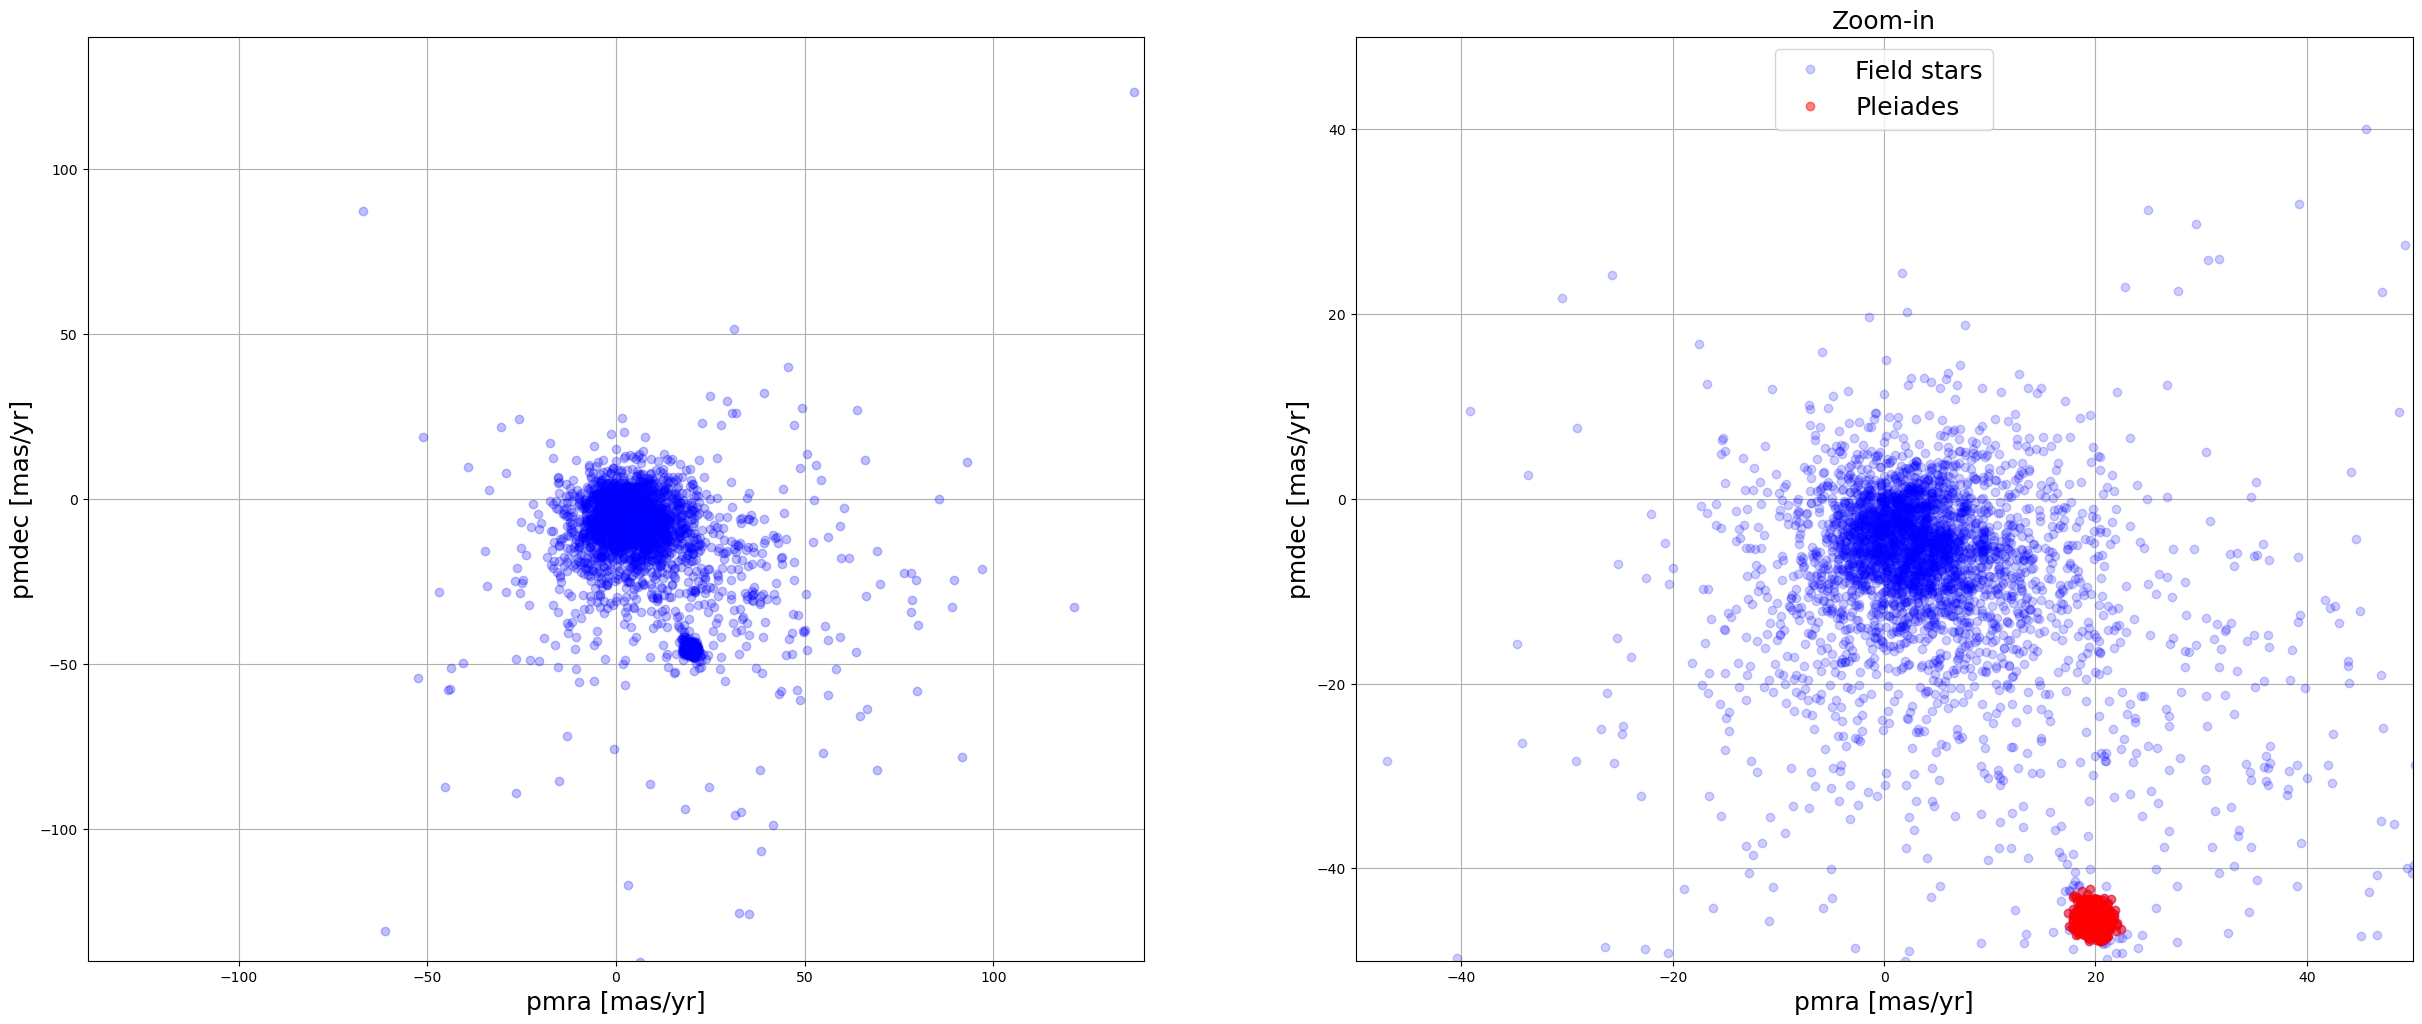

In [107]:

# Selecting Pleiades candidate members in the PMRA-PMDEC space
radius_pm = 3   # Radius in the PMRA-PMDEC space to select Pleiades sample
pmra_c    = 20  # Approximate center of the Pleiades Cluster pmra.
pmdec_c   = -45 # Approximate center of the Pleiades Cluster pmdec.
els       = np.sqrt((results['pmra'] - pmra_c)**2 + (results['pmdec'] - pmdec_c)**2) < radius_pm  # Pleiades selection
pl_samp   = results[els]  # Selected stars as Pleiades candidates

# Canvas function (if you don't have make_canvas, this is an alternative)
def make_canvas(title='', xlabel='', ylabel='', fontsize=18, show_grid=True, show_legend=False):
    plt.title(title, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    if show_grid:
        plt.grid(True)
    if show_legend:
        plt.legend(fontsize=fontsize)

# Plot Configuration and Panels ============================

fig = plt.figure(figsize=[30,12])  # Figure size
fontsize = 18  # Font size for labels and title

# Panel 1 ===============
plt.subplot(121)  # Subplot 1 (left)
plt.plot(results['pmra'], results['pmdec'], 'bo', alpha=0.25)  # Field stars in blue
make_canvas(xlabel='pmra [mas/yr]', ylabel='pmdec [mas/yr]', fontsize=fontsize, show_grid=True)

z_fac = 140  # Zoom factor
plt.xlim([-z_fac, z_fac])  # Set X-axis limits
plt.ylim([-z_fac, z_fac])  # Set Y-axis limits

# Panel 2 ===============
plt.subplot(122)  # Subplot 2 (right)
plt.plot(results['pmra'], results['pmdec'], 'bo', alpha=0.20, label='Field stars')  # Field stars
plt.plot(pl_samp['pmra'], pl_samp['pmdec'], 'ro', alpha=0.50, label='Pleiades')  # Pleiades candidate members in red

z_fac = 50  # Zoom factor for the right panel
plt.xlim([-z_fac, z_fac])  # Set X-axis limits
plt.ylim([-z_fac, z_fac])  # Set Y-axis limits

# Add title and labels
make_canvas(title='Zoom-in', xlabel='pmra [mas/yr]', ylabel='pmdec [mas/yr]', fontsize=fontsize, show_grid=True, show_legend=True)

# Show the plot
plt.savefig("fig19.pdf")
plt.show()
